# spectral_bandwidth
* spectral_bandwidth([y, sr, S, n_fft, …])
* librosa.feature.spectral_bandwidth(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect', freq=None, centroid=None, norm=True, p=2)
* p차 프레임 주파수 대역폭을 계산한다.

    y : np.ndarray [shape=(n,)] or None | 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것    
    sr : number > 0 [scalar] | 샘플링레이트,  1초당 샘플의 개수, 단위 Hz 또는 kHz    
    S : np.ndarray [shape=(d, t)] or None | (선택사항) spectrogram 진폭    
    n_fft : int > 0 [scalar] | FFT window size    
    hop_length : int > 0 [scalar] | STFT 컬럼 간의 간격    
    win_length : int <= n_fft [scalar] | window에 의해 윈도우 사이즈가 정해진다. window size는 win_length와 일치되도록 0으로 채워진다. n_fft와 매칭된다.    
    window : string, tuple, number, function, or np.ndarray [shape=(n_fft,)]    
    center : boolean | True이면 y가 패딩되어서 y[t * hop_length] 로 센터가 맞춰진다. Fasle라고 하면 t(스펙트럼의 대역폭)가 패딩되어서 y[t * hop_length] 로 센터가  맞춰진다.    
    pad_mode : string |  center=True라면 패딩모드가 적용된다. 그냥 디폴트라면 STFT가 패딩으로 사용된다.    
    리턴값 : centroid 주파수    
    freq : None or np.ndarray [shape=(d,) or shape=(d, t)] | 중심 주파수, None일 때 FFT 주파수가 사용된다.    
    centroid : None or np.ndarray [shape=(1, t)] | 미리 계산된 중심 주파수    
    norm : bool | 미리 계산된 스펙트럴 에너지를 정규화한다.    
    p : float > 0 | 스펙트럼 중심으로부터 편차를 높인다.    
    리턴값 : 각 프레임 별 주파수 대역폭       

In [1]:
# 영리's voice
import librosa
y, sr = librosa.load('../../nmb_data/teamvoice/testvoice_F2.wav')

----------------------

# 디폴트

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old

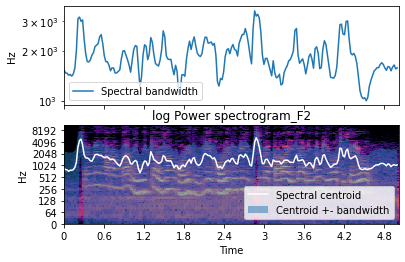

In [2]:
# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S)

# [3] bin center frequencies
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
spec_bw3 = librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram_F2')
ax[1].fill_between(times, centroid[0] - spec_bw1[0], centroid[0] + spec_bw1[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old

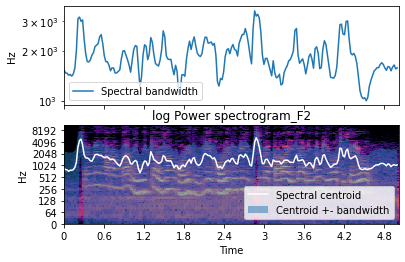

In [7]:
# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
# spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr)
# print("y : ", y)
# print("sr : ", sr)
# print("y길이 : ", len(y))
# print("Sampling rate (KHz) : %d" % sr)                  
# print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
# print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw2.shape)

# [3] bin center frequencies
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
spec_bw3 = librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw2)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw2[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram_F2')
ax[1].fill_between(times, centroid[0] - spec_bw2[0], centroid[0] + spec_bw2[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old

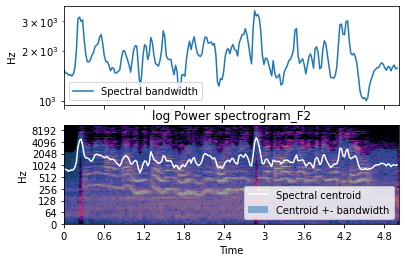

In [8]:
# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
# spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr)
# print("y : ", y)
# print("sr : ", sr)
# print("y길이 : ", len(y))
# print("Sampling rate (KHz) : %d" % sr)                  
# print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
# print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw2.shape)

# [3] bin center frequencies
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
spec_bw3 = librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw3)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw3[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram_F2')
ax[1].fill_between(times, centroid[0] - spec_bw3[0], centroid[0] + spec_bw3[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

# hop_length

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 862)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

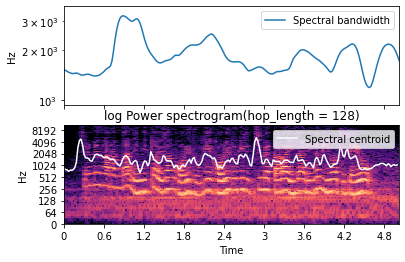

In [26]:
# hop_length = 128

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, hop_length = 128)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, hop_length = 128)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, hop_length = 128)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(hop_length = 128)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 108)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

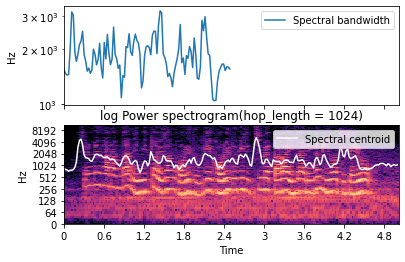

In [27]:
# hop_length = 1024

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, hop_length = 1024)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, hop_length = 1024)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, hop_length = 1024)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(hop_length = 1024)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

# n_fft


y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

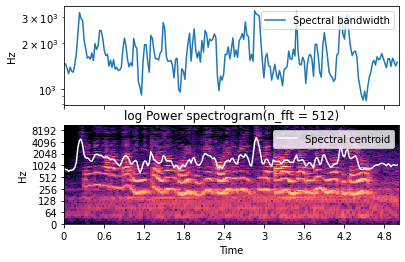

In [3]:
# n_fft =512

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft = 512)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, n_fft = 512)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, n_fft = 512)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(n_fft = 512)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

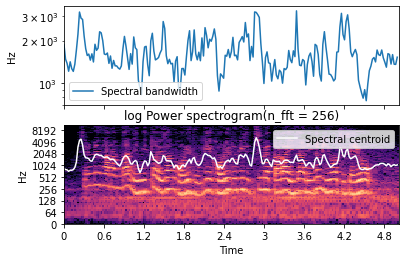

In [4]:
# n_fft = 256

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft = 256)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, n_fft = 256)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, n_fft = 256)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(n_fft = 256)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

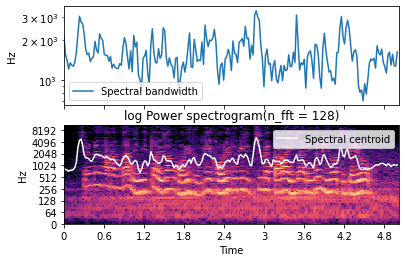

In [5]:
# n_fft = 128

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft = 128)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, n_fft = 128)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, n_fft = 128)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(n_fft = 128)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

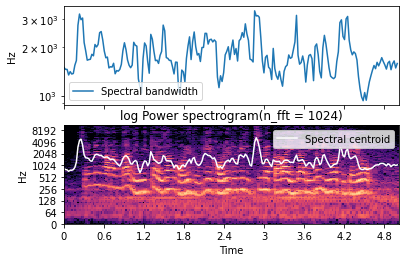

In [6]:
# n_fft = 1024

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft = 1024)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, n_fft = 1024)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, n_fft = 1024)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(n_fft = 1024)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

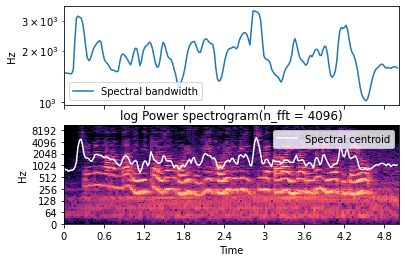

In [7]:
# n_fft = 4096

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft = 4096)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, n_fft = 4096)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, n_fft = 4096)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(n_fft = 4096)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

-------------------

# 그 외 파라미터 튜닝

# win_length

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

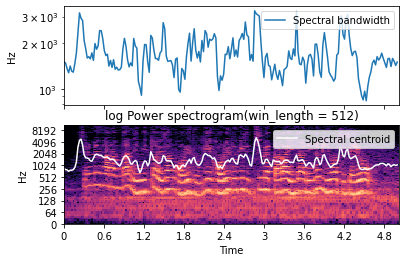

In [8]:
# win_length = 512

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, win_length = 512)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, win_length = 512)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, win_length = 512)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(win_length = 512)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

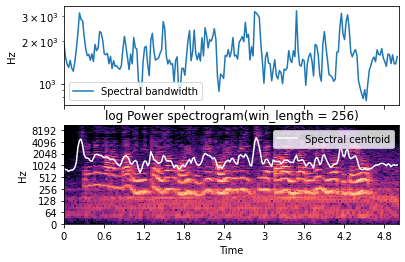

In [9]:
# win_length = 256

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, win_length = 256)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, win_length = 256)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, win_length = 256)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(win_length = 256)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

# center

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 212)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

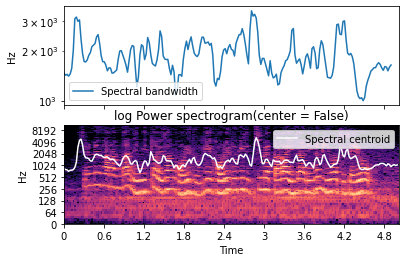

In [10]:
# center = False

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, center = False)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, center = False)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, center = False)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(center = False)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

# pad_mode

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

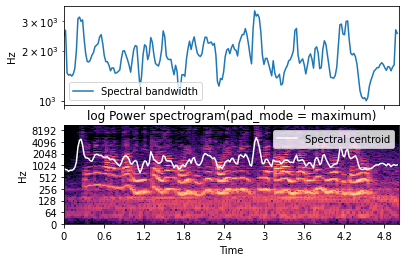

In [12]:
# pad_mode = maximum

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, pad_mode = 'maximum')
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, pad_mode = 'maximum')

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S, pad_mode = 'maximum')
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(pad_mode = maximum)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

# norm

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

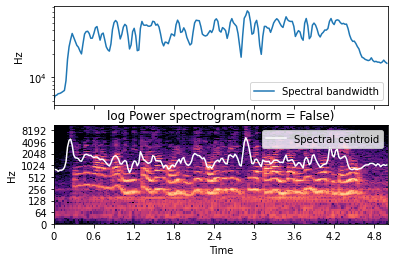

In [14]:
# norm = False

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, norm = False)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, norm = False)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(norm = False)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

# p

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

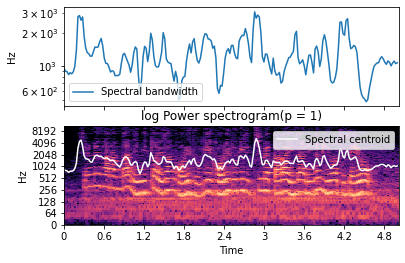

In [17]:
# p = 1

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p = 1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, p = 1)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(p = 1)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()

y :  [-2.9244100e-05 -7.4235257e-05 -9.4395844e-05 ...  6.2298583e-04
 -1.2165480e-03 -4.3098307e-03]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
spec_bw.shape :  (1, 216)
centroid.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotl

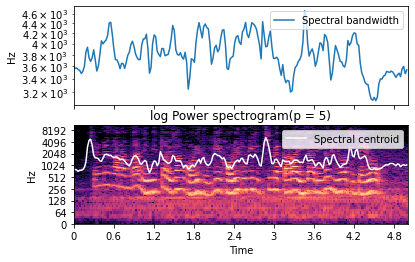

In [16]:
# p = 5

# 디폴트 값
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# [1] y : audio time series.
spec_bw1 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p = 5)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("spec_bw.shape : ", spec_bw1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
spec_bw2 = librosa.feature.spectral_bandwidth(S=S, p = 5)

# Graph

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw1)
centroid = librosa.feature.spectral_centroid(S=S)
print("centroid.shape : ", centroid.shape)

ax[0].semilogy(times, spec_bw1[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

times2 = librosa.times_like(centroid)
ax[1].set(title='log Power spectrogram(p = 5)')
ax[1].plot(times2, centroid.T, label='Spectral centroid', color='w')
ax[1].legend(loc='upper right')

plt.show()